In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset('titanic')
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
from random import random
temp=np.random.uniform(df['age'].min(),df['age'].max())
df['age']=df['age'].fillna(temp)

In [5]:
del df['deck']

In [6]:
df.dropna(subset=['embarked'],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [7]:
df.dropna(subset=['embark_town'],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

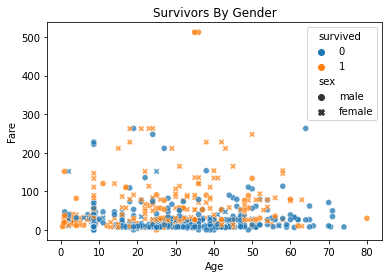

In [8]:
#Scatter Plot for Survivors by gender
sns.scatterplot(x='age',y='fare',hue='survived',data=df,style='sex',alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Survivors By Gender')
plt.show()

In [9]:
mean_survivors=df['survived'].mean()
print('The Mean of Survivors is -',mean_survivors)

The Mean of Survivors is - 0.38245219347581555


In [10]:
#Number of Male & Female Survivors
male_survivors=df[(df['sex']=='male') & (df['survived']==1)]
female_survivors=df[(df['sex']=='female') & (df['survived']==1)]
male_survivors_count=len(male_survivors)
female_survivors_count=len(female_survivors)

print("Number of male survivors:", male_survivors_count)
print("Number of female survivors:", female_survivors_count)

Number of male survivors: 109
Number of female survivors: 231


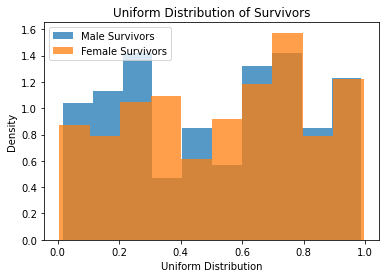

In [11]:
#Uniform Distribution for Male & Female Survivors
male_uniform=np.random.uniform(low=0.0,high=1.0,size=len(male_survivors))
female_uniform=np.random.uniform(low=0.0,high=1.0,size=len(female_survivors))

plt.hist(male_uniform, alpha=0.75, label='Male Survivors', density=True)
plt.hist(female_uniform, alpha=0.75, label='Female Survivors', density=True)
plt.xlabel('Uniform Distribution')
plt.ylabel('Density')
plt.title('Uniform Distribution of Survivors')
plt.legend()
plt.show()

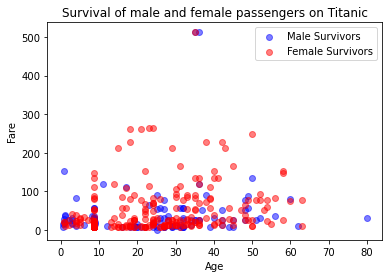

In [12]:
#ScatterPlot for Survivors
plt.scatter(male_survivors['age'],male_survivors['fare'],color='b',alpha=0.5,label='Male Survivors')
plt.scatter(female_survivors['age'],female_survivors['fare'],color='r',alpha=0.5,label='Female Survivors')
plt.title('Survival of male and female passengers on Titanic')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

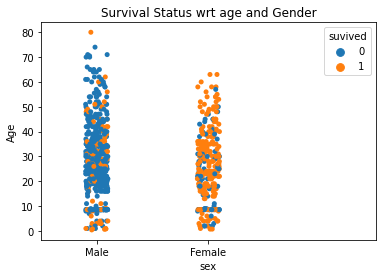

In [13]:
#StripPlot for Survivors
sns.stripplot(x="sex", y="age", hue="survived", data=df,jitter=True)
plt.title("Survival Status wrt age and Gender")
plt.xlabel("sex")
plt.ylabel("Age")
plt.xlim(-0.5, 2.5)
plt.xticks([0, 1], ["Male", "Female"]) 
plt.legend(title="suvived", loc="upper right")

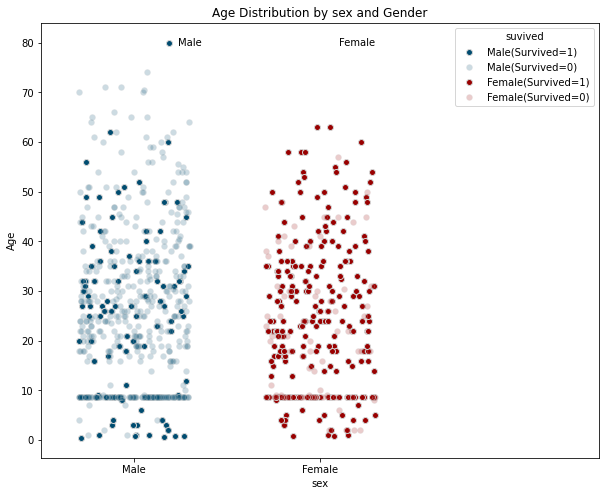

In [14]:
# Filter the data by gender and survival status-Stripplot
male_pos = df[(df['sex'] == 'male') & (df['survived'] == 1)]['age']
male_neg = df[(df['sex'] == 'male') & (df['survived'] == 0)]['age']
female_pos = df[(df['sex'] == 'female') & (df['survived'] == 1)]['age']
female_neg = df[(df['sex'] == 'female') & (df['survived'] == 0)]['age']

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

np.random.seed(42)

# Male Stripplot
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', edgecolor='lightgray', alpha=0.2, label='Male(Survived=0)')

# Female Stripplot
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Female(Survived=0)')

plt.title("Age Distribution by sex and Gender")
plt.xlabel("sex")
plt.ylabel("Age")
plt.xlim(-0.5, 2.5)  # set x-axis limits
plt.xticks([0, 1], ["Male", "Female"])  # set x-axis tick labels
plt.legend(title="suvived", loc="upper right")
ax.text(0.3, 80, 'Male', ha='center', va='center')
ax.text(1.2, 80, 'Female', ha='center', va='center')

# show the plots
plt.show()